In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("persona.csv");df

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17
...,...,...,...,...,...
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31


In [2]:
pd.DataFrame({"sayi":df["SOURCE"].value_counts(),
              "ratio":df["SOURCE"].value_counts(normalize =True)})

,sayi,ratio
SOURCE,,
android,2974,0.5948
ios,2026,0.4052


In [3]:
df["PRICE"].unique()

array([39, 49, 29, 19, 59,  9], dtype=int64)

In [4]:
df["PRICE"].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

In [5]:
df["COUNTRY"].value_counts()

COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

<Axes: xlabel='COUNTRY'>

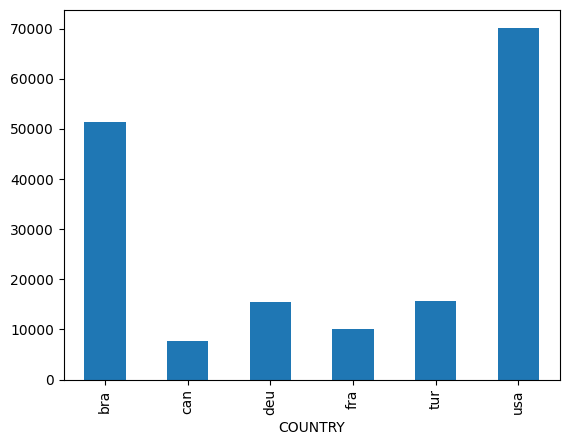

In [6]:
a=df.groupby("COUNTRY")["PRICE"].sum()
a.plot.bar()

In [7]:
a

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [8]:
df.SOURCE.value_counts()

SOURCE
android    2974
ios        2026
Name: count, dtype: int64

In [9]:
df.groupby("COUNTRY").PRICE.mean()

COUNTRY
bra    34.327540
can    33.608696
deu    34.032967
fra    33.587459
tur    34.787140
usa    34.007264
Name: PRICE, dtype: float64

In [10]:
df.groupby("SOURCE").PRICE.mean()

SOURCE
android    34.174849
ios        34.069102
Name: PRICE, dtype: float64

In [11]:
df.groupby(["COUNTRY","SOURCE"])["PRICE"].mean().to_frame()

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [12]:
df.groupby(["COUNTRY","SOURCE"])["PRICE"].mean().to_frame().reset_index()

,COUNTRY,SOURCE,PRICE
0,bra,android,34.387029
1,bra,ios,34.222222
2,can,android,33.330709
3,can,ios,33.951456
4,deu,android,33.869888
5,deu,ios,34.268817
6,fra,android,34.312500
7,fra,ios,32.776224
8,tur,android,36.229437
9,tur,ios,33.272727


In [13]:
df.pivot_table(index="COUNTRY",values="PRICE",columns="SOURCE")

SOURCE,android,ios
COUNTRY,,
bra,34.387029,34.222222
can,33.330709,33.951456
deu,33.869888,34.268817
fra,34.312500,32.776224
tur,36.229437,33.272727
usa,33.760357,34.371703


In [14]:
agg_df=df.groupby(["COUNTRY","SOURCE","SEX","AGE"])["PRICE"].mean().to_frame();agg_df

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

In [15]:
agg_df=agg_df.sort_values(by="PRICE",ascending=False)

In [16]:
agg_df.loc["bra","ios",:]

PRICE
SEX    AGE           
female 22   44.000000
male   43   42.333333
female 19   39.000000
       25   39.000000
       42   39.000000
male   33   37.571429
       22   37.181818
       15   36.878788
female 15   36.777778
male   35   36.777778
female 18   36.500000
       33   35.363636
       45   35.363636
male   17   35.333333
female 37   35.111111
male   23   34.882353
       34   34.714286
female 26   34.333333
       54   34.000000
       27   34.000000
male   19   34.000000
female 24   34.000000
male   24   33.864865
       16   33.761905
female 16   33.687500
male   44   33.545455
female 46   33.000000
       20   32.846154
male   18   32.684211
female 17   32.636364
       28   32.333333
       35   32.333333
male   21   31.000000
female 29   30.428571
male   66   30.428571
       42   30.111111
female 23   29.769231
male   31   29.000000
       37   29.000000
female 31   27.571429
male   36   22.333333
female 34   19.000000
male   47   19.000000

In [17]:
agg_df=agg_df.reset_index()

In [18]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


In [19]:
bins = [0,18,23,30,40,70]
labels =["0_18","19_23","24_30","31_40","41_70"]
pd.cut(x=agg_df["AGE"],bins=bins,labels=labels,include_lowest=True)

0      41_70
1      31_40
2      24_30
3      31_40
4      31_40
       ...  
343    31_40
344    24_30
345    24_30
346     0_18
347    24_30
Name: AGE, Length: 348, dtype: category
Categories (5, object): ['0_18' < '19_23' < '24_30' < '31_40' < '41_70']

In [20]:
agg_df["AGE_CAT"] = pd.cut(x=agg_df["AGE"],bins=bins,labels=labels,include_lowest=True)
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


In [21]:
agg_df["AGE_CAT"] = agg_df["AGE_CAT"].astype("O")

In [22]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  348 non-null    object 
 1   SOURCE   348 non-null    object 
 2   SEX      348 non-null    object 
 3   AGE      348 non-null    int64  
 4   PRICE    348 non-null    float64
 5   AGE_CAT  348 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.4+ KB


In [23]:
agg_df["COUNTRY"].str.upper()ag + "_" + agg_df["SOURCE"].str.upper() + "_" + agg_df["SEX"].str.upper() + "_" + agg_df["AGE_CAT"].str.upper()

0        BRA_ANDROID_MALE_41_70
1        USA_ANDROID_MALE_31_40
2      FRA_ANDROID_FEMALE_24_30
3            USA_IOS_MALE_31_40
4      DEU_ANDROID_FEMALE_31_40
                 ...           
343        USA_IOS_FEMALE_31_40
344        USA_IOS_FEMALE_24_30
345    CAN_ANDROID_FEMALE_24_30
346       FRA_ANDROID_MALE_0_18
347      DEU_ANDROID_MALE_24_30
Length: 348, dtype: object

In [24]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


In [26]:
[f"{a}_{b}_{c}_{d}".upper() for a, b, c, d in zip(agg_df['COUNTRY'], agg_df['SOURCE'], agg_df['SEX'], agg_df['AGE_CAT'])]

['BRA_ANDROID_MALE_41_70',
 'USA_ANDROID_MALE_31_40',
 'FRA_ANDROID_FEMALE_24_30',
 'USA_IOS_MALE_31_40',
 'DEU_ANDROID_FEMALE_31_40',
 'DEU_ANDROID_FEMALE_41_70',
 'DEU_IOS_MALE_19_23',
 'USA_ANDROID_FEMALE_41_70',
 'FRA_IOS_MALE_19_23',
 'USA_IOS_MALE_41_70',
 'DEU_ANDROID_MALE_0_18',
 'BRA_ANDROID_FEMALE_24_30',
 'USA_ANDROID_FEMALE_41_70',
 'TUR_IOS_MALE_24_30',
 'DEU_ANDROID_MALE_31_40',
 'TUR_IOS_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_41_70',
 'BRA_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'TUR_IOS_MALE_31_40',
 'TUR_ANDROID_MALE_0_18',
 'USA_IOS_MALE_24_30',
 'BRA_IOS_MALE_41_70',
 'DEU_ANDROID_MALE_19_23',
 'USA_IOS_MALE_24_30',
 'TUR_ANDROID_FEMALE_0_18',
 'USA_ANDROID_MALE_41_70',
 'TUR_ANDROID_MALE_24_30',
 'USA_IOS_FEMALE_41_70',
 'FRA_ANDROID_MALE_19_23',
 'USA_IOS_MALE_31_40',
 'TUR_ANDROID_FEMALE_0_18',
 'FRA_IOS_MALE_0_18',
 'TUR_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'TUR_ANDROID_MALE_24_30',
 'FRA_ANDROID_MALE_19_23',
 'BRA_AN

In [34]:
for i,k in zip(agg_df['COUNTRY'], agg_df['SOURCE']):
    print(f"{i}_{k}".upper())

BRA_ANDROID
USA_ANDROID
FRA_ANDROID
USA_IOS
DEU_ANDROID
DEU_ANDROID
DEU_IOS
USA_ANDROID
FRA_IOS
USA_IOS
DEU_ANDROID
BRA_ANDROID
USA_ANDROID
TUR_IOS
DEU_ANDROID
TUR_IOS
BRA_ANDROID
BRA_IOS
TUR_ANDROID
BRA_ANDROID
TUR_IOS
TUR_ANDROID
USA_IOS
BRA_IOS
DEU_ANDROID
USA_IOS
TUR_ANDROID
USA_ANDROID
TUR_ANDROID
USA_IOS
FRA_ANDROID
USA_IOS
TUR_ANDROID
FRA_IOS
TUR_IOS
TUR_ANDROID
TUR_ANDROID
FRA_ANDROID
BRA_ANDROID
CAN_ANDROID
CAN_ANDROID
USA_ANDROID
TUR_ANDROID
BRA_ANDROID
BRA_ANDROID
USA_IOS
TUR_ANDROID
BRA_IOS
USA_IOS
BRA_IOS
DEU_ANDROID
DEU_IOS
FRA_ANDROID
FRA_ANDROID
TUR_IOS
FRA_IOS
BRA_ANDROID
TUR_IOS
BRA_IOS
TUR_ANDROID
TUR_ANDROID
BRA_ANDROID
USA_IOS
USA_IOS
FRA_IOS
TUR_ANDROID
DEU_ANDROID
USA_IOS
DEU_IOS
CAN_IOS
CAN_ANDROID
BRA_ANDROID
TUR_ANDROID
CAN_IOS
BRA_IOS
FRA_ANDROID
DEU_IOS
CAN_ANDROID
TUR_IOS
DEU_ANDROID
BRA_ANDROID
USA_ANDROID
BRA_IOS
BRA_ANDROID
BRA_ANDROID
USA_ANDROID
TUR_ANDROID
DEU_IOS
BRA_ANDROID
BRA_IOS
USA_IOS
BRA_IOS
BRA_IOS
FRA_ANDROID
USA_ANDROID
BRA_IOS
BRA_ANDROID


In [28]:
# agg_df=agg_df[["customers_level_based","PRICE"]]

In [36]:
agg_df["customers_level_based"] =[f"{a}_{b}_{c}_{d}".upper() for a, b, c, d in zip(agg_df["COUNTRY"],agg_df["SOURCE"],agg_df["SEX"],agg_df["AGE_CAT"])]

In [40]:
agg_df=agg_df.groupby("customers_level_based")["PRICE"].mean().to_frame()

In [41]:
agg_df

,PRICE
customers_level_based,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_70,36.737179
...,...
USA_IOS_MALE_0_18,33.983495
USA_IOS_MALE_19_23,34.901872
USA_IOS_MALE_24_30,34.838143


In [42]:
pd.qcut(agg_df["PRICE"],q=4,labels=["D","C","B","A"])

customers_level_based
BRA_ANDROID_FEMALE_0_18     B
BRA_ANDROID_FEMALE_19_23    C
BRA_ANDROID_FEMALE_24_30    C
BRA_ANDROID_FEMALE_31_40    B
BRA_ANDROID_FEMALE_41_70    A
                           ..
USA_IOS_MALE_0_18           C
USA_IOS_MALE_19_23          B
USA_IOS_MALE_24_30          B
USA_IOS_MALE_31_40          A
USA_IOS_MALE_41_70          B
Name: PRICE, Length: 109, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [44]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"],q=4,labels=["D","C","B","A"])
agg_df

,PRICE,SEGMENT
customers_level_based,,
BRA_ANDROID_FEMALE_0_18,35.645303,B
BRA_ANDROID_FEMALE_19_23,34.077340,C
BRA_ANDROID_FEMALE_24_30,33.863946,C
BRA_ANDROID_FEMALE_31_40,34.898326,B
BRA_ANDROID_FEMALE_41_70,36.737179,A
...,...,...
USA_IOS_MALE_0_18,33.983495,C
USA_IOS_MALE_19_23,34.901872,B
USA_IOS_MALE_24_30,34.838143,B


In [45]:
agg_df=agg_df.reset_index()

In [48]:
agg_df.groupby("SEGMENT")["PRICE"].agg(["min","mean","max","sum"])

,min,mean,max,sum
SEGMENT,,,,
D,19.000000,29.206780,32.333333,817.789833
C,32.500000,33.509674,34.077340,904.761209
B,34.103727,34.999645,36.000000,944.990411
A,36.060606,38.691234,45.428571,1044.663328


In [50]:
agg_df[agg_df["customers_level_based"]=="TUR_ANDROID_FEMALE_31_40"]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [51]:
agg_df[agg_df["customers_level_based"]=="FRA_IOS_FEMALE_31_40"]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
